In [1]:
import pybullet as p
import pybullet_data
import time
import math
import numpy as np
import matplotlib.pyplot as plt

pybullet build time: Oct 13 2024 21:19:28
Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [9]:
# Connect to the PyBullet physics server
physicsClient = p.connect(p.GUI)

Version = 4.1 Metal - 88.1
Vendor = Apple
Renderer = Apple M1 Pro
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started


In [10]:
# Set up the simulation environment
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -9.81)
planeId = p.loadURDF("plane.urdf")

In [11]:
# Load a simple robot model (we'll use a sphere as a placeholder)
startPos = [0, 0, 1]
startOrientation = p.getQuaternionFromEuler([0, 0, 0])
robotId = p.loadURDF("sphere2red.urdf", startPos, startOrientation)

In [12]:
# Set up camera
p.resetDebugVisualizerCamera(cameraDistance=5, cameraYaw=0, cameraPitch=-40, cameraTargetPosition=[0,0,0])

In [13]:
trajectory = []

In [14]:
# Simulation loop
for i in range(100):
    # Move the robot in a circular path
    time_step = i * 0.01
    x = math.cos(time_step)
    y = math.sin(time_step)
    z = 1  # Keep height constant
    
    p.resetBasePositionAndOrientation(robotId, [x, y, z], startOrientation)

    pos, _ = p.getBasePositionAndOrientation(robotId)

    trajectory.append(pos)

    
    # Step the simulation
    p.stepSimulation()

    
    time.sleep(1./240.)  # Slow down the simulation

In [23]:
p.disconnect()

error: Not connected to physics server.

: 

In [21]:
trajectory_np = np.array(trajectory)
print(trajectory_np)

[[1.         0.         1.        ]
 [0.99995    0.00999983 1.        ]
 [0.99980001 0.01999867 1.        ]
 [0.99955003 0.0299955  1.        ]
 [0.99920011 0.03998933 1.        ]
 [0.99875026 0.04997917 1.        ]
 [0.99820054 0.05996401 1.        ]
 [0.997551   0.06994285 1.        ]
 [0.99680171 0.07991469 1.        ]
 [0.99595273 0.08987855 1.        ]
 [0.99500417 0.09983342 1.        ]
 [0.9939561  0.1097783  1.        ]
 [0.99280864 0.11971221 1.        ]
 [0.99156189 0.12963414 1.        ]
 [0.990216   0.13954311 1.        ]
 [0.98877108 0.14943813 1.        ]
 [0.98722728 0.15931821 1.        ]
 [0.98558477 0.16918235 1.        ]
 [0.98384369 0.17902957 1.        ]
 [0.98200424 0.18885889 1.        ]
 [0.98006658 0.19866933 1.        ]
 [0.97803091 0.2084599  1.        ]
 [0.97589745 0.21822962 1.        ]
 [0.9736664  0.22797752 1.        ]
 [0.97133797 0.23770263 1.        ]
 [0.96891242 0.24740396 1.        ]
 [0.96638998 0.25708055 1.        ]
 [0.9637709  0.26673144 1.  

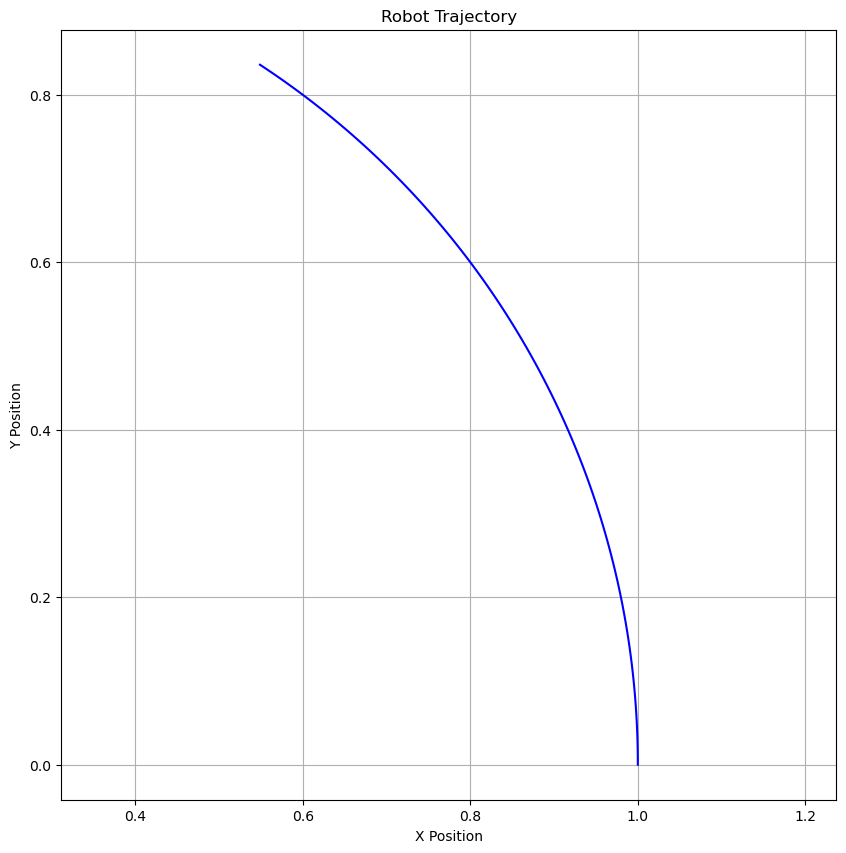

In [19]:
# Plot the trajectory
plt.figure(figsize=(10, 10))
plt.plot(trajectory_np[:, 0], trajectory_np[:, 1], 'b-')
plt.title('Robot Trajectory')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.axis('equal')
plt.grid(True)
plt.show()

In [22]:
import csv

with open('robot_trajectory.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write the header
    csv_writer.writerow(['X', 'Y', 'Z'])
    # Write the data
    csv_writer.writerows(trajectory)

print("Trajectory saved as 'robot_trajectory.csv'")

Trajectory saved as 'robot_trajectory.csv'
